In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import os

In [2]:
filepath=r"C:\Users\CSIO\Desktop\Diabetic Foot Research\Machine Learning Implementation\dataset_with_4_classes\combined_data\final.csv"
data=pd.read_csv(filepath)
data

,MTK1.T,MTK2.T,MTK3.T,MTK4.T,MTK5.T,D1.T,L.T,C.T,max_temp,min_temp,temp_range,condition
0,0.983221,1.579631,1.926185,2.091407,1.760453,0.619983,1.272439,0.915525,2.091407,0.619983,1.471423,0
1,0.125197,0.094649,0.608958,0.700101,1.500195,0.227996,1.762956,2.435764,2.435764,0.094649,2.341115,0
2,0.335517,0.938675,0.493425,0.343672,1.189942,1.257875,1.669362,1.263756,1.669362,0.335517,1.333844,0
3,0.343761,0.276866,0.537738,0.246287,1.398624,1.630739,0.438513,0.423720,1.630739,0.246287,1.384452,0
4,0.704690,1.595115,1.218438,0.859128,1.165247,0.722619,1.235193,3.400332,3.400332,0.704690,2.695642,1
...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.572060,0.651480,0.323167,2.548236,1.137525,3.652500,0.942357,0.385682,3.652500,0.323167,3.329333,1
74,1.643545,2.232720,2.246896,1.983081,1.971958,1.429466,1.704914,1.288972,2.246896,1.288972,0.957924,0
75,0.381049,1.013439,0.216111,0.816165,1.821659,1.642428,1.033259,0.374977,1.821659,0.216111,1.605548,0
76,0.609831,0.426914,1.071384,1.597074,2.917671,0.594115,3.530871,2.749073,3.530871,0.426914,3.103957,1


In [28]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['condition'])
y=data['condition']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

# K-NN Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

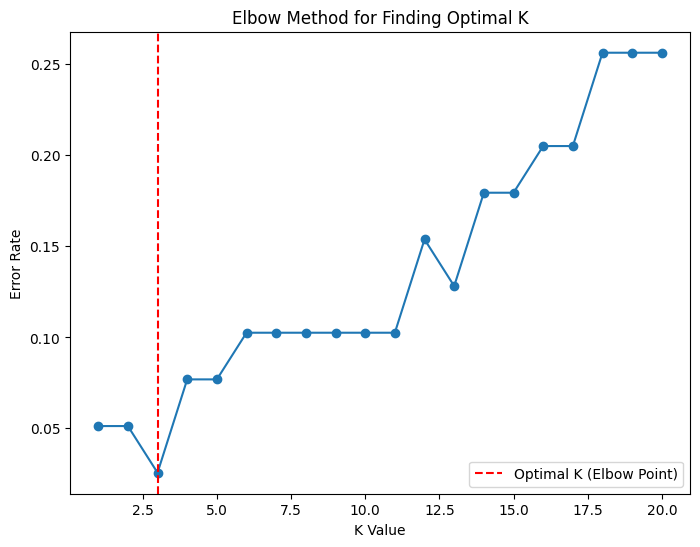

In [30]:
k_values=range(1,21)
error_rate=[]

for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    error=1-accuracy_score(y_pred,y_test)
    error_rate.append(error)

plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rate, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Finding Optimal K')
plt.axvline(x=3, linestyle='--', color='red', label="Optimal K (Elbow Point)")
plt.legend()
plt.show()

In [31]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(f"Testing Accuracy:{accuracy*100:.2f}%")

Testing Accuracy:97.44%


In [33]:
y_pred=knn.predict(X_train)
accuracy=accuracy_score(y_pred,y_train)
print(f"Training Accuracy:{accuracy*100:.2f}%")

Training Accuracy:100.00%


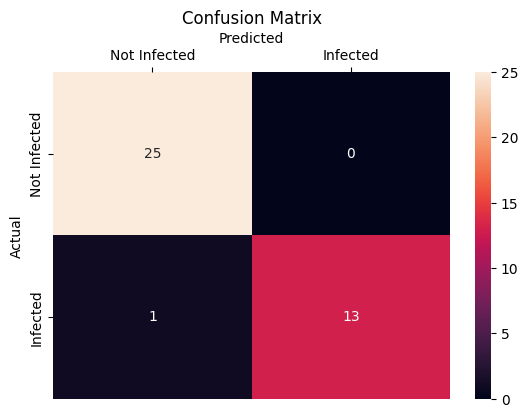

Accuracy: 97.436%
Precision: 100.000%
Sensitivity (Recall): 96.154%
F1-Score: 98.039%


In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

actual=y_test
predicted=knn.predict(X_test)
cm=confusion_matrix(actual,predicted)

sns.heatmap(cm,annot=True,fmt='g',
           xticklabels=['Not Infected','Infected'],
           yticklabels=['Not Infected','Infected'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()


TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy: {accuracy*100:.3f}%")
print(f"Precision: {precision*100:.3f}%")
print(f"Sensitivity (Recall): {recall*100:.3f}%")
print(f"F1-Score: {f1_score*100:.3f}%")

In [17]:
print(classification_report(predicted,actual))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         8

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



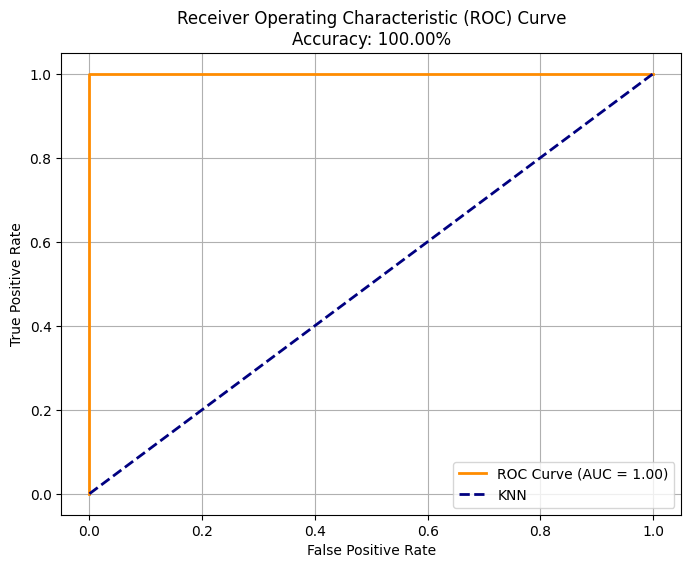

In [18]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Predict probabilities (only for the positive class)
y_prob = knn.predict_proba(X_test)[:, 1]

# Predict labels (for accuracy)
y_pred = knn.predict(X_test)

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [35]:
import warnings
warnings.filterwarnings("ignore")
values=[[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,0.1,0.7]]
cond=knn.predict(values)
print(cond)

[0]


In [36]:
values=[[3.1,3,3,3,3,3,3,3,3.1,3,0.1]]
cond=knn.predict(values)
print(cond)

[1]


In [37]:
values=[[4.149849,	5.530390,	4.016367,	3.915858,	2.414940,	3.060105,	0.416193,	4.773635,	5.530390,	0.416193,	5.114198	]]
cond=knn.predict(values)
print(cond)

[1]


In [38]:
values=[[3,3,3,3,3,3,3,3,3,3,0]]
cond=knn.predict(values)
print(cond)

[1]


In [39]:
values=[[0,0,0,0,0,0,0,0,0,0,0]]
cond=knn.predict(values)
print(cond)

[0]


In [40]:
values=[[3.1,3,3,3,3,3,3,3,3.1,3,0.1]]
cond=knn.predict(values)
print(cond)

[1]


In [41]:
import warnings
warnings.filterwarnings("ignore")
values=[[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,0.1,0.7]]
cond=knn.predict(values)
print(cond)

[0]


In [43]:
#failed here
values=[[3.5,0.2,2.3,2.4,2.5,1.6,2.7,0.8,3.5,0.2,3.3]]
cond=knn.predict(values)
print(cond)

[0]


In [44]:
values=[[0.414943,	1.192581,	1.365798,	0.995435,	2.109256,	0.506431,	2.456453,	2.918048,	2.918048,	0.414943,	2.503104	]]
cond=knn.predict(values)
print(cond)

[0]


In [45]:
#failed here
values=[[3.5,0.2,2.3,2.4,2.5,1.6,2.7,0.8,3.5,0.2,3.3]]
cond=knn.predict(values)
print(cond)

[0]


In [48]:
#failed here
values=[[3.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,3.1,0.3,2.8]]
cond=knn.predict(values)
print(cond)

[0]


In [49]:
values=[[3.1,3,3,3,3,3,3,3,3.1,3,0.1]]
cond=knn.predict(values)
print(cond)

[1]


In [50]:
values=[[3,3,3,3,3,3,3,3,3,3,0]]
cond=knn.predict(values)
print(cond)

[1]


In [51]:
values=[[0,0.1,0,0.3,0.4,0,0,0,0.4,0.1,0.3]]
cond=knn.predict(values)
print(cond)

[0]


In [52]:
values=[[0,0,0,0,0,0,0,0,0,0,0]]
cond=knn.predict(values)
print(cond)

[0]


In [53]:
values=[[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,0.1,0.7]]
cond=knn.predict(values)
print(cond)

[0]


In [54]:
values=[[3.1,2.2,0.3,4.4,0.5,0.6,0.7,0.8,4.4,0.3,4.1]]
cond=knn.predict(values)
print(cond)

[1]


In [55]:
values=[[2.0,2.0,2.3,2.4,2.5,2.6,0.7,0.8,2.6,0.7,1.9]]
cond=knn.predict(values)
print(cond)

[0]


In [56]:
values=[[6.1,2.2,0.3,0.4,0.5,0.6,9.7,0.8,6.1,0.3,5.8]]
cond=knn.predict(values)
print(cond)

[1]


In [58]:
#failed here
values=[[3.5,0.2,2.3,2.4,2.5,1.6,2.7,0.8,3.5,0.2,3.3]]
cond=knn.predict(values)
print(cond)

[0]


In [59]:
import joblib 
joblib.dump(knn,r"C:\Users\CSIO\Desktop\Diabetic Foot Research\Machine Learning Implementation\Data_Preprocessing_3\knn_model.h5")
print("Model saved!!")

Model saved!!


In [60]:
def predict_and_plot(model, values):
    prediction = model.predict(values)
    if(prediction == 0):
        print("Patient is Normal")
    if(prediction == 0 and max(values[0])>=3):
        print("Model made wrong prediction....Handled this case")
        x = ['MTK1.T', 'MTK2.T', 'MTK3.T', 'MTK4.T', 'MTK5.T', 'D1.T', 'L.T', 'C.T']
        y = values[0][:-3]

        high_temp_features = [(feature, val) for feature, val in zip(x, y) if val >= 3]
        plt.figure(figsize=(8,6))
        plt.plot(x,y, marker = 'o')
        plt.title("Temperature difference sensor readings")
        plt.xlabel("Sensor")
        plt.ylabel("Value")
        plt.grid(True)

        for feature, val in high_temp_features:
            plt.annotate(f"{val}", xy=(feature,val),
                        xytext=(feature,val + 0.2),
                        arrowprops=dict(facecolor='red',shrink=0.05),
                        ha = 'center', color = 'red')
        plt.show()
        print(f"Patient might develop ulcer/infection on the following regions:")
        for feature, val in high_temp_features:
            print(f" {feature}: temperature difference = {val}")
    
    else:
        x = ['MTK1.T', 'MTK2.T', 'MTK3.T', 'MTK4.T', 'MTK5.T', 'D1.T', 'L.T', 'C.T']
        y = values[0][:-3]

        high_temp_features = [(feature, val) for feature, val in zip(x, y) if val >= 3]
        plt.figure(figsize=(8,6))
        plt.plot(x,y, marker = 'o')
        plt.title("Temperature difference sensor readings")
        plt.xlabel("Sensor")
        plt.ylabel("Value")
        plt.grid(True)

        for feature, val in high_temp_features:
            plt.annotate(f"{val}", xy=(feature,val),
                        xytext=(feature,val + 0.2),
                        arrowprops=dict(facecolor='red',shrink=0.05),
                        ha = 'center', color = 'red')
        plt.show()
        print(f"Patient might develop ulcer/infection on the following regions:")
        for feature, val in high_temp_features:
            print(f" {feature}: temperature difference = {val}")

In [61]:
import shap
def get_shap_prediction(model,values):
    explainer = shap.Explainer(model.predict, X_train)
    shap_values = explainer.shap_values(X_test)
    values=np.array(values)
    shap_values=explainer.shap_values(values)
    print("**********************************************************************************************")
    print("Feature Importance Plot Using Explainable AI for inference")
    shap.summary_plot(shap_values,values, plot_type='bar',feature_names=X_test.columns)

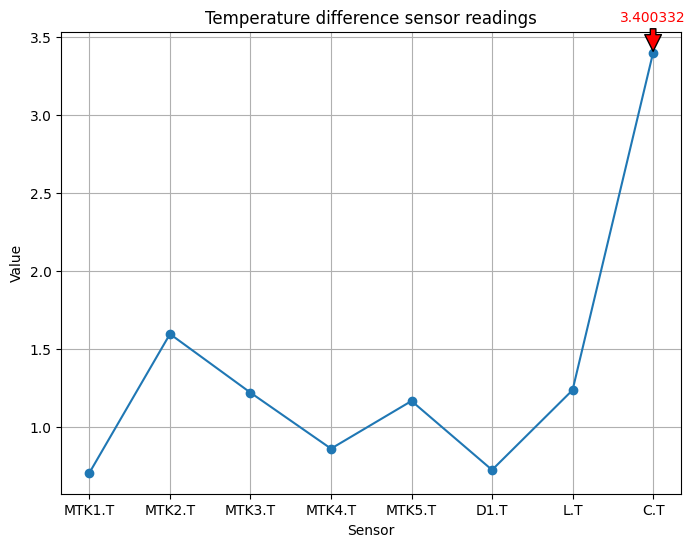

Patient might develop ulcer/infection on the following regions:
 C.T: temperature difference = 3.400332


PermutationExplainer explainer: 40it [00:12,  1.43it/s]                                                                


**********************************************************************************************
Feature Importance Plot Using Explainable AI for inference


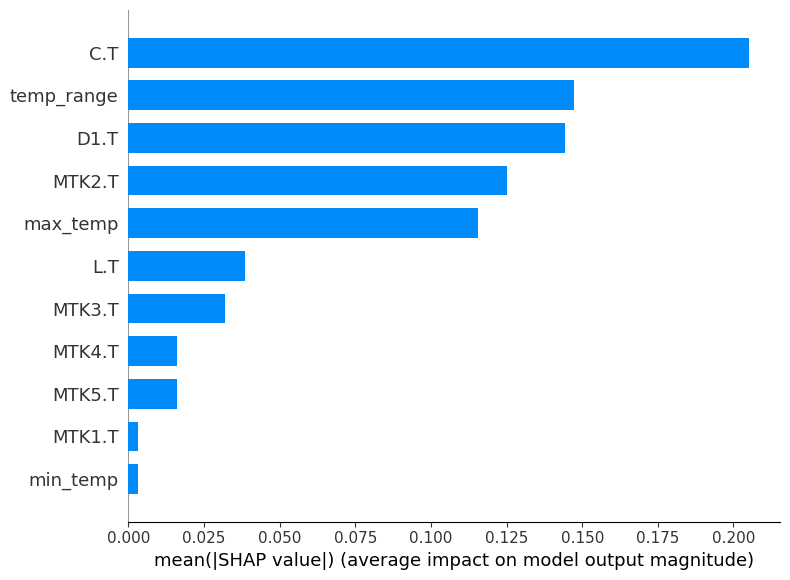

In [62]:
values=[[0.704690, 1.595115	,1.218438, 0.859128, 1.165247, 0.722619 , 1.235193 ,3.400332,3.400332, 0.704690 , 2.695642]]
predict_and_plot(knn,values)
get_shap_prediction(knn,values)